In [1]:
# decision tree

In [2]:
# decision tree can split the node based on there purity 

In [3]:
# tree overfit because the they learn noise and memorize the training data

In [4]:
# tree does not need feature scaling becauses they split the data whille logistic regression need feature scaling

In [5]:
import joblib
df=joblib.load('../learning_notebooks/03_Model_Building_Logistic_Regression.ipynb')

In [6]:
# build decesion ttree 

In [8]:
# prefare data 
X=df.drop('Loan_Status_Y',axis=1)
y=df['Loan_Status_Y']

In [9]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# no scaling require for decesion treee model

In [11]:
# build model 
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(
   criterion='gini',
    random_state=42
)
dt_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# Prediction
y_pred_dt=dt_model.predict(X_test)
y_prob_dt=dt_model.predict_proba(X_test)[:,1]

In [13]:
# evalution
from sklearn.metrics import confusion_matrix,classification_report
print("\nconfusion_matrix : \n",confusion_matrix(y_test,y_pred_dt))
print("\nclassification_report : \n",classification_report(y_test,y_pred_dt))


confusion_matrix : 
 [[23 20]
 [15 65]]

classification_report : 
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        43
           1       0.76      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123



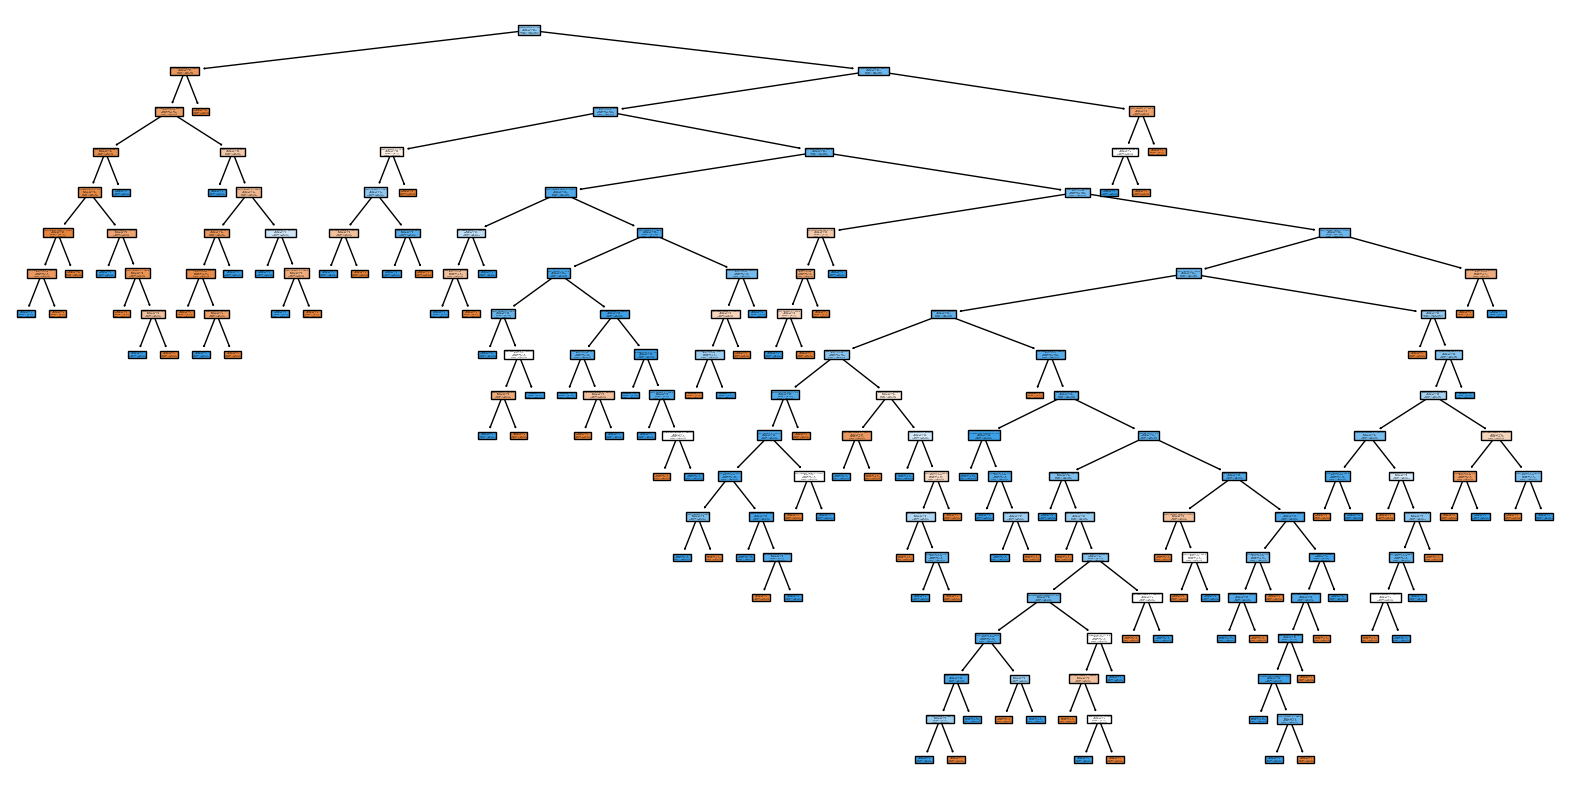

In [14]:
# visualize the tree using plot tree 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns, 
    class_names=['Rejected','Approved'],
    filled=True
)
plt.show()

In [15]:
# feature importance
dt_model.feature_importances_

array([0.00984951, 0.19207604, 0.05987162, 0.13439126, 0.02872996,
       0.25724286, 0.24238215, 0.        , 0.00527978, 0.02150555,
       0.013543  , 0.0032118 , 0.00693481, 0.02498166, 0.        ,
       0.        , 0.        ])

In [16]:
# overfitting and pruning

In [17]:
# to detect overfitting to check train  and test score 
dt_model.score(X_train,y_train)

1.0

In [18]:
dt_model.score(X_test,y_test)

0.7154471544715447

In [34]:
# pruned tree model 
dt_pruned_model=DecisionTreeClassifier(
    max_depth=5, 
    min_samples_leaf=5,
    random_state=42
)
dt_pruned_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# prediction of pruned tree 
dt_pruned_pred=dt_pruned_model.predict(X_test)


In [36]:
# cclassification_report of pruned tree 
print("\nclassification_report : \n",classification_report(y_test,dt_pruned_pred))


classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.49      0.61        43
           1       0.77      0.94      0.85        80

    accuracy                           0.78       123
   macro avg       0.79      0.71      0.73       123
weighted avg       0.79      0.78      0.76       123



In [37]:
# train & test accuracy
dt_pruned_model.score(X_train,y_train)

0.8289205702647657

In [38]:
dt_pruned_model.score(X_test,y_test)

0.7804878048780488